In [2]:
from __future__ import unicode_literals, division
import numpy as np
from skimage import io, color
import torch
import torch.nn.functional as F
import torch.nn as nn
import cv2
from torch.autograd import Variable
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms

from torch import nn
from torchvision import transforms, datasets
import torch.utils.data as Data
from torch.utils.data import Dataset, DataLoader
import os
from PIL import Image
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
from PIL import ImageFilter
import math

#global variable

cuda = torch.cuda.is_available()
print(cuda)
# di = '/home/kamata/neo/datasets'
# di = 'G:/data_Project/linda_data/Datasets'
BATCH = 2
LR = 0.0001  # learning rate

True


In [3]:
print("hello world"
      "an di")

hello worldan di


In [2]:
from ColorNet3 import *
net = ColorNet()
net = net.cuda()
# net = net2.cpu()
# means module move to GPU

In [9]:
print(net)

ColorNet(
  (g): UNet(
    (inc): inconv(
      (conv): double_conv(
        (conv): Sequential(
          (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU(inplace)
          (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (5): ReLU(inplace)
        )
      )
    )
    (down1): down(
      (mpconv): Sequential(
        (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (1): double_conv(
          (conv): Sequential(
            (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU(inplace)
            (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1

In [11]:
# # 分开的dataset
# data_transform = transforms.Compose([
# #     transforms.Scale(256),
#     transforms.CenterCrop(480),
# #     transforms.RandomResizedCrop(224),
# #     transforms.RandomHorizontalFlip(),
    
#     transforms.ToTensor(),                                   # Convert a PIL Image or numpy.ndarray to tensor.
#     #transforms.Normalize(mean=[0.485, 0.456, 0.406],
#     #                        std=[0.229, 0.224, 0.225])
# ])
# data_transform2 = transforms.Compose([
# #     transforms.Scale(256),
#     transforms.CenterCrop(480),
# #     transforms.RandomResizedCrop(224),
# #     transforms.RandomHorizontalFlip(),
# #     transforms.TenCrop(640,vertical_flip=False),
# #     Lambda(lambda crops: torch.stack([ToTensor()(crop) for crop in crops])),
#     transforms.ToTensor(),

# ])
# # hymenoptera_dataset1 = datasets.ImageFolder(root='/home/kamata/linda/0508/train-urban/rgb',
# #                                            transform=data_transform)
# hymenoptera_dataset1 = datasets.ImageFolder(
#     root='/home/dan/linda_project2/linda_data/Datasets/datasetcol/',    # in torchvision.datasets
#                                             transform=data_transform)
# dataset_loader1 = torch.utils.data.DataLoader(hymenoptera_dataset1,
#                                               batch_size=BATCH, shuffle=False,
#                                               num_workers=1)
# # hymenoptera_dataset2 = datasets.ImageFolder(root='/home/kamata/linda/0508/train-urban/nir', #infared
# #                                            transform=data_transform)
# hymenoptera_dataset2 = datasets.ImageFolder(
#     root='/home/dan/linda_project2/linda_data/Datasets/datasetnir/',
#                                             transform=data_transform2)
# dataset_loader2 = torch.utils.data.DataLoader(hymenoptera_dataset2,
#                                               batch_size=BATCH, shuffle=False,
#                                               num_workers=1)
# # here I changed the num_workers


In [12]:
# d2 = enumerate(dataset_loader2)
# data2 = d2.__next__()
# print(data1[1][0][0])

In [13]:
# new_image2 = transforms.ToPILImage()(data2[1][0][0]).convert('RGB')
# new_image2.show()

In [7]:
class ConcatDataset(torch.utils.data.Dataset):
    def __init__(self, *datasets):
        self.datasets = datasets

    def __getitem__(self, i):
        return tuple(d[i] for d in self.datasets)

    def __len__(self):
        return min(len(d) for d in self.datasets)


In [117]:
# # copy from blog
# class GetData(Dataset):
#     def __init__(self,path0,path1): #得到名字list
#         super(GetData,self).__init__()
#         self.path0 = path0
#         self.path1 = path1
#         self.name0_list = os.listdir(self.path0)
#         self.name1_list = os.listdir(self.path1)
#         self.img2data = transforms.Compose([transforms.ToTensor()])
 
#     def __len__(self):
#         return len(self.name0_list)
 
#     def __getitem__(self, index): #按名取图,index对应批次
#         self.name0 = self.name0_list[index]
#         self.name1 = self.name1_list[index]
#         img0 = Image.open(os.path.join(self.path0, self.name0))
#         img1 = Image.open(os.path.join(self.path1, self.name1))
#         imgdata0 = self.img2data(img0)
#         imgdata1 = self.img2data(img1)
 
#         return imgdata0, imgdata1

In [4]:
data_transform = transforms.Compose([
    transforms.CenterCrop(480),
    transforms.ToTensor(),
])
hymenoptera_dataset1 = datasets.ImageFolder(
    root='/home/dan/linda_project2/linda_data/Datasets/datasetcol/', 
    transform=data_transform)

hymenoptera_dataset2 = datasets.ImageFolder(
    root='/home/dan/linda_project2/linda_data/Datasets/datasetnir/',
    transform=data_transform)

dataset_loader = torch.utils.data.DataLoader(
#     GetData('/home/dan/linda_project2/linda_data/Datasets/Hibikino dataset/trainC/1/', 
#             '/home/dan/linda_project2/linda_data/Datasets/Hibikino dataset/trainI/1/'),
#     ConcatDataset(hymenoptera_dataset1, hymenoptera_dataset2),
    
    batch_size = BATCH,
    shuffle = True,
    num_workers = 1)

TypeError: __init__() missing 1 required positional argument: 'dataset'

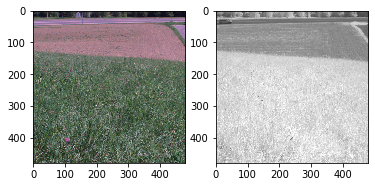

In [9]:
d1 = enumerate(dataset_loader)
values = d1.__next__()
image1 = values[1][0][0][0]
image2 = values[1][1][0][0]
ima_col = transforms.ToPILImage()(image1).convert('RGB')
ima_nir = transforms.ToPILImage()(image2).convert('RGB')
plt.subplot(121)
plt.imshow(ima_col)
plt.subplot(122)
plt.imshow(ima_nir)
plt.show()

In [10]:
# 合二为一的dataset
t0 = transforms.Compose([transforms.ToTensor(),
                         ])
t1 = transforms.Compose([transforms.ToPILImage(),
                         ])
costs2 = []
epoch = 0
optim2 = torch.optim.Adam(net.parameters(), 0.0001)

#net = net.cuda()
def train(epoch):
    i = 0
    j = 0
    costs2 = []
    net.train()    # sets the module training mode
    d1 = enumerate(dataset_loader)    # enumerate 将一个可遍历的数据对象组合成一个索引序列， 给出数据和数据下标
#     d2 = enumerate(dataset_loader)    # tuple format
    global da1, da2
    #print(len(dataset_loader1))
    for i in range(len(dataset_loader)):    # length of dataset_loader1 is batches, how many batches, now is 480
        data = d1.__next__()
#         data1 = d1.__next__()   # next batch
#         data2 = d2.__next__()
        da0 = data[1][0][0]    # means batch_size pictures, each 3 channels, each follow HW
        da2 = data[1][1][0]
        da3 = da0.clone()
        da4 = data[1][0][1] # 文件名，类
        da5 = data[1][1][1] # also
        
        optim2.zero_grad()
        # uv=rgb here
        for j in range(len(da3)):   # 4
            da1 = da3[j]    # each image
            da1 = t1(da1)   # to PIL image
            da1 = da1.filter(ImageFilter.FIND_EDGES)
            da1 = t0(da1)  # go back to tensor
            da1 = da1
            da3[j] = da1   # filt back
            
        
        da0 = da0.cuda()
        da3 = da3.cuda()
        da2 = da2.cuda()
        da4 = da4.cuda()
        da5 = da5.cuda()
#         da3 = da3.cpu()
#         da2 = da2.cpu()
#         da0 = da0.cpu()
        
        da0 = Variable(da0, requires_grad=False)
        da2 = Variable(da2[:, 0:1, :, :], requires_grad=False)   # 0:1 means what? / one channel, only
        da3 = Variable(da3[:, 0:1, :, :], requires_grad=False)
#         preuv, rgb, preclass = net(da2, da0)
        rgb = net(da2, da0)
        cost1 = F.mse_loss(rgb, da0)
#         cost2 = F.mse_loss(preuv, da3)
        
#         cost3 = F.cross_entropy(preclass, da5)
        # F.mse_loss measures the element-wise mean squared error  (input, target)
        
        #cost3 = F.cross_entropy(preclass, da4)
#         cost = cost1 + cost2 + 1/200*cost3
# #         cost = cost1 + cost2
# #         now concern that only unet was used
        cost = cost1

        cost.backward()

        optim2.step()

        if i % 10 == 0:
            print(cost.data.cpu().item(), i, epoch)
            costs2.append(cost.data.cpu().item())

    return costs2


In [52]:
# t0 = transforms.Compose([transforms.ToTensor(),
#                          ])
# t1 = transforms.Compose([transforms.ToPILImage(),
#                          ])
# costs2 = []
# epoch = 0
# optim2 = torch.optim.Adam(net.parameters(), 0.0001)

# #net = net.cuda()
# def train(epoch):
#     i = 0
#     j = 0
#     costs2 = []
#     net.train()    # sets the module training mode
#     d1 = enumerate(dataset_loader1)    # enumerate 将一个可遍历的数据对象组合成一个索引序列， 给出数据和数据下标
#     d2 = enumerate(dataset_loader2)    # tuple format
#     global da1, da2
#     #print(len(dataset_loader1))
#     for i in range(len(dataset_loader1)):    # length of dataset_loader1 is batches, how many batches, now is 480
#         data1 = d1.__next__()   # next batch
#         data2 = d2.__next__()
#         da0 = data1[1][0]    # means 4 pictures, each 3 channels, each follow HW
#         da2 = data2[1][0]
#         da3 = da0.clone()
        
# #        da4 = data1[1][1] # 文件名，类
# #        da5 = data2[1][1] # also
        
#         optim2.zero_grad()
#         # uv=rgb here
#         for j in range(len(da3)):   # 4
#             da1 = da3[j]    # each image
#             da1 = t1(da1)   # to PIL image
#             da1 = da1.filter(ImageFilter.FIND_EDGES)
#             da1 = t0(da1)  # go back to tensor
#             da1 = da1
#             da3[j] = da1   # filt back
            
        
#         da0 = da0.cuda()
#         da3 = da3.cuda()
#         da2 = da2.cuda()
# #         da4 = da4.cuda()

# #         da3 = da3.cpu()
# #         da2 = da2.cpu()
# #         da0 = da0.cpu()
        
#         da0 = Variable(da0, requires_grad=False)
#         da2 = Variable(da2[:, 0:1, :, :], requires_grad=False)   # 0:1 means what? / one channel, only
#         da3 = Variable(da3[:, 0:1, :, :], requires_grad=False)
# #         preuv, rgb = net(da2, da0)
#         rgb = net(da2, da0)
#         cost1 = F.mse_loss(rgb, da0)
# #         cost2 = F.mse_loss(preuv, da3)
        
# #         cost3 = F.cross_entropy(preclass, da4)
#         # F.mse_loss measures the element-wise mean squared error  (input, target)
        
#         #cost3 = F.cross_entropy(preclass, da4)
# #         cost = cost1 + cost2
# #         now concern that only unet was used
#         cost = cost1

#         cost.backward()

#         optim2.step()

#         if i % 10 == 0:
#             print(cost.data.cpu().item(), i, epoch)
#             costs2.append(cost.data.cpu().item())

#     return costs2


In [8]:
net.load_state_dict(torch.load('/home/dan/linda_project2/linda_data/Datasets/newtest6/midle.pkl'))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [11]:

epoch = 0
for j in range(300):
    costs2x = train(epoch)
    costs2 = costs2 + costs2x
    if epoch % 100 == 0:
        torch.save(net.state_dict(), 
                   '/home/dan/linda_project2/linda_data/Datasets/newtest10/'+str(epoch)+'newtest10.pkl')

    epoch = epoch + 1

            


0.15640346705913544 0 0
0.07192344963550568 10 0
0.09791743755340576 20 0
0.22025376558303833 30 0
0.07036656886339188 40 0
0.14097394049167633 50 0
0.121897853910923 60 0
0.04722832888364792 70 0
0.12507688999176025 80 0
0.11268305778503418 90 0
0.023919327184557915 100 0
0.04695345088839531 110 0
0.13547168672084808 120 0
0.04000097140669823 130 0
0.03091990388929844 140 0
0.06799570471048355 150 0
0.03327203914523125 160 0
0.07772893458604813 170 0
0.08395790308713913 180 0
0.08419566601514816 190 0
0.11045308411121368 200 0
0.016936607658863068 0 1
0.11430832743644714 10 1
0.020234443247318268 20 1
0.07215024530887604 30 1
0.021120624616742134 40 1
0.025361884385347366 50 1
0.16895830631256104 60 1
0.09058787673711777 70 1
0.04008710756897926 80 1
0.051339924335479736 90 1
0.05481705814599991 100 1
0.05741424113512039 110 1
0.06895022094249725 120 1
0.0697508379817009 130 1
0.04335113987326622 140 1
0.04363057017326355 150 1
0.034900810569524765 160 1
0.029821155592799187 170 1
0.0

0.03470805287361145 190 14
0.039112638682127 200 14
0.03761943802237511 0 15
0.027363818138837814 10 15
0.034974973648786545 20 15
0.05001275986433029 30 15
0.054029226303100586 40 15
0.018749229609966278 50 15
0.04379596188664436 60 15
0.035054441541433334 70 15
0.024994682520627975 80 15
0.03195905312895775 90 15
0.03150001913309097 100 15
0.04097668454051018 110 15
0.015289407223463058 120 15
0.041038502007722855 130 15
0.040968555957078934 140 15
0.035864342004060745 150 15
0.030604839324951172 160 15
0.03378849849104881 170 15
0.026848843321204185 180 15
0.03920169547200203 190 15
0.03049715980887413 200 15
0.035854633897542953 0 16
0.016860421746969223 10 16
0.019334016367793083 20 16
0.058678142726421356 30 16
0.02103837952017784 40 16
0.025081442669034004 50 16
0.02415195293724537 60 16
0.025333119556307793 70 16
0.02666185237467289 80 16
0.07093297690153122 90 16
0.02956562489271164 100 16
0.009775841608643532 110 16
0.05245772749185562 120 16
0.020228547975420952 130 16
0.038

0.03452683612704277 80 29
0.019336247816681862 90 29
0.03682664781808853 100 29
0.030635975301265717 110 29
0.03805563226342201 120 29
0.03180936723947525 130 29
0.0577506460249424 140 29
0.03707955405116081 150 29
0.03548378869891167 160 29
0.01970396190881729 170 29
0.0169364046305418 180 29
0.03224554657936096 190 29
0.02465100586414337 200 29
0.05220447853207588 0 30
0.021198289468884468 10 30
0.031483184546232224 20 30
0.026839107275009155 30 30
0.04324875399470329 40 30
0.018449926748871803 50 30
0.011561247520148754 60 30
0.01507004164159298 70 30
0.012854967266321182 80 30
0.036238279193639755 90 30
0.029721802100539207 100 30
0.07511798292398453 110 30
0.02399643138051033 120 30
0.03293792903423309 130 30
0.021945102140307426 140 30
0.017268892377614975 150 30
0.021577252075076103 160 30
0.018705107271671295 170 30
0.053781747817993164 180 30
0.04955900460481644 190 30
0.017935195937752724 200 30
0.0259566493332386 0 31
0.01091828104108572 10 31
0.01812535896897316 20 31
0.025

0.019979942589998245 170 43
0.016349345445632935 180 43
0.014468012377619743 190 43
0.028816353529691696 200 43
0.01882064901292324 0 44
0.021645495668053627 10 44
0.023984991014003754 20 44
0.013070410117506981 30 44
0.02914338931441307 40 44
0.021111736074090004 50 44
0.06465354561805725 60 44
0.012060388922691345 70 44
0.01808520220220089 80 44
0.02477087266743183 90 44
0.03498950973153114 100 44
0.03148065134882927 110 44
0.0195870790630579 120 44
0.015828797593712807 130 44
0.012701072730123997 140 44
0.048266246914863586 150 44
0.018644345924258232 160 44
0.023661091923713684 170 44
0.027345526963472366 180 44
0.011807211674749851 190 44
0.026210062205791473 200 44
0.015597534365952015 0 45
0.027609067037701607 10 45
0.018487481400370598 20 45
0.024541012942790985 30 45
0.0626295953989029 40 45
0.018830256536602974 50 45
0.011345789767801762 60 45
0.012919302098453045 70 45
0.02069171890616417 80 45
0.03303394466638565 90 45
0.02141999825835228 100 45
0.018553167581558228 110 45


0.01569311134517193 50 58
0.023075299337506294 60 58
0.02371683157980442 70 58
0.037936028093099594 80 58
0.01735221967101097 90 58
0.03545430675148964 100 58
0.025680381804704666 110 58
0.03925405815243721 120 58
0.009972617030143738 130 58
0.02901044301688671 140 58
0.015400438569486141 150 58
0.017057863995432854 160 58
0.04378329962491989 170 58
0.02124457247555256 180 58
0.028319017961621284 190 58
0.02050507813692093 200 58
0.022432437166571617 0 59
0.025374386459589005 10 59
0.016160840168595314 20 59
0.01485957857221365 30 59
0.042830370366573334 40 59
0.016651825979351997 50 59
0.035879168659448624 60 59
0.018714118748903275 70 59
0.022767215967178345 80 59
0.031424909830093384 90 59
0.01689327135682106 100 59
0.010808460414409637 110 59
0.0075839813798666 120 59
0.01294727623462677 130 59
0.018603632226586342 140 59
0.01573747955262661 150 59
0.011874305084347725 160 59
0.020521363243460655 170 59
0.014290197752416134 180 59
0.01251052413135767 190 59
0.0486266203224659 200 5

0.04356752336025238 140 72
0.025010697543621063 150 72
0.015779701992869377 160 72
0.021957090124487877 170 72
0.024745946750044823 180 72
0.033833425492048264 190 72
0.01647009886801243 200 72
0.012260191142559052 0 73
0.02542458474636078 10 73
0.024237817153334618 20 73
0.039123546332120895 30 73
0.04844139888882637 40 73
0.018066328018903732 50 73
0.022598333656787872 60 73
0.02061425894498825 70 73
0.024257052689790726 80 73
0.02092093601822853 90 73
0.031453248113393784 100 73
0.012939797714352608 110 73
0.017654690891504288 120 73
0.027866052463650703 130 73
0.01891893334686756 140 73
0.030094465240836143 150 73
0.024685267359018326 160 73
0.01490845438092947 170 73
0.006220349110662937 180 73
0.02368820458650589 190 73
0.019386429339647293 200 73
0.011920948512852192 0 74
0.040692780166864395 10 74
0.023056143894791603 20 74
0.021457640454173088 30 74
0.01205279491841793 40 74
0.020084790885448456 50 74
0.011274385266005993 60 74
0.037988316267728806 70 74
0.03504689782857895 80

0.02687099017202854 20 87
0.01712699979543686 30 87
0.010725090280175209 40 87
0.014744174666702747 50 87
0.022781413048505783 60 87
0.017122112214565277 70 87
0.029738036915659904 80 87
0.01362501922994852 90 87
0.013758325949311256 100 87
0.008016535080969334 110 87
0.016274679452180862 120 87
0.013329870067536831 130 87
0.010058924555778503 140 87
0.012706876732409 150 87
0.011782635934650898 160 87
0.010798675939440727 170 87
0.017379622906446457 180 87
0.014718265272676945 190 87
0.020479891449213028 200 87
0.032072097063064575 0 88
0.013683121651411057 10 88
0.02230953797698021 20 88
0.018819861114025116 30 88
0.011577838100492954 40 88
0.010458651930093765 50 88
0.012933681719005108 60 88
0.011325516737997532 70 88
0.017698459327220917 80 88
0.022280333563685417 90 88
0.02474110573530197 100 88
0.005095957778394222 110 88
0.010139922611415386 120 88
0.007770375348627567 130 88
0.019778799265623093 140 88
0.04047007858753204 150 88
0.015643129125237465 160 88
0.01313854195177555 

0.014189125038683414 90 101
0.00782992783933878 100 101
0.009695873595774174 110 101
0.03409772366285324 120 101
0.011575712822377682 130 101
0.014178353361785412 140 101
0.013326249085366726 150 101
0.01868872530758381 160 101
0.012188877910375595 170 101
0.0193936787545681 180 101
0.008111353032290936 190 101
0.01539161242544651 200 101
0.018620634451508522 0 102
0.012923209927976131 10 102
0.016571320593357086 20 102
0.025271419435739517 30 102
0.014713304117321968 40 102
0.02485276386141777 50 102
0.010417008772492409 60 102
0.010704319924116135 70 102
0.013447177596390247 80 102
0.013817543163895607 90 102
0.012124891392886639 100 102
0.01779128797352314 110 102
0.026919422671198845 120 102
0.01548678893595934 130 102
0.015030798502266407 140 102
0.017007602378726006 150 102
0.008844073861837387 160 102
0.04501268267631531 170 102
0.014223847538232803 180 102
0.014442766085267067 190 102
0.015966564416885376 200 102
0.015691395848989487 0 103
0.016934707760810852 10 103
0.01086877

0.00916244462132454 50 115
0.014935290440917015 60 115
0.008543102070689201 70 115
0.012076975777745247 80 115
0.01560555212199688 90 115
0.010567959398031235 100 115
0.01866418495774269 110 115
0.010551491752266884 120 115
0.014169780537486076 130 115
0.011297864839434624 140 115
0.010829336941242218 150 115
0.013340081088244915 160 115
0.011976048350334167 170 115
0.01976156421005726 180 115
0.011788967996835709 190 115
0.005729416850954294 200 115
0.011430229991674423 0 116
0.00836636871099472 10 116
0.014932665973901749 20 116
0.017808422446250916 30 116
0.02825956605374813 40 116
0.011616640724241734 50 116
0.012442468665540218 60 116
0.023361138999462128 70 116
0.008005186915397644 80 116
0.00835676770657301 90 116
0.012174713425338268 100 116
0.015520784072577953 110 116
0.02061953954398632 120 116
0.013837708160281181 130 116
0.009288754314184189 140 116
0.026327624917030334 150 116
0.017372112721204758 160 116
0.022589415311813354 170 116
0.01786878891289234 180 116
0.02789291

0.00900220312178135 10 129
0.015289104543626308 20 129
0.01668364368379116 30 129
0.0106420386582613 40 129
0.009120973758399487 50 129
0.009613998234272003 60 129
0.009611201472580433 70 129
0.015433790162205696 80 129
0.00976620800793171 90 129
0.013027018867433071 100 129
0.009328046813607216 110 129
0.016434993594884872 120 129
0.0178839024156332 130 129
0.009421663358807564 140 129
0.018917476758360863 150 129
0.012964251451194286 160 129
0.012090417556464672 170 129
0.018628356978297234 180 129
0.007516767829656601 190 129
0.00843121949583292 200 129
0.005325509700924158 0 130
0.004928035195916891 10 130
0.010147970169782639 20 130
0.023520369082689285 30 130
0.01132880337536335 40 130
0.016382308676838875 50 130
0.02115792967379093 60 130
0.007890580222010612 70 130
0.011505898088216782 80 130
0.010456251911818981 90 130
0.009464502334594727 100 130
0.013336444273591042 110 130
0.01106058619916439 120 130
0.0101089458912611 130 130
0.012178022414445877 140 130
0.0073061985895037

0.014550779946148396 180 142
0.01846296153962612 190 142
0.008292006328701973 200 142
0.011400549672544003 0 143
0.011309387162327766 10 143
0.01832546480000019 20 143
0.0103449746966362 30 143
0.008883374743163586 40 143
0.01063531357795 50 143
0.015104684978723526 60 143
0.005104043986648321 70 143
0.006511473562568426 80 143
0.00810947734862566 90 143
0.010099966078996658 100 143
0.008789723739027977 110 143
0.015501430258154869 120 143
0.01833437569439411 130 143
0.007809145376086235 140 143
0.01280564721673727 150 143
0.015533501282334328 160 143
0.005502798594534397 170 143
0.011813146993517876 180 143
0.008749226108193398 190 143
0.009282942861318588 200 143
0.011396951042115688 0 144
0.008807181380689144 10 144
0.01653403788805008 20 144
0.011369144544005394 30 144
0.013090881519019604 40 144
0.007908046245574951 50 144
0.01095191016793251 60 144
0.014447067864239216 70 144
0.006932965014129877 80 144
0.013403652235865593 90 144
0.01625664345920086 100 144
0.016261005774140358 

0.00884675607085228 140 156
0.009896737523376942 150 156
0.012549670413136482 160 156
0.012880800291895866 170 156
0.008518013171851635 180 156
0.00536305969581008 190 156
0.01880795881152153 200 156
0.00882031675428152 0 157
0.011165277101099491 10 157
0.014061211608350277 20 157
0.01230600755661726 30 157
0.011199784465134144 40 157
0.010138459503650665 50 157
0.009974587708711624 60 157
0.009684686549007893 70 157
0.011780161410570145 80 157
0.008161795325577259 90 157
0.00858833733946085 100 157
0.015093325637280941 110 157
0.007875700481235981 120 157
0.007364792283624411 130 157
0.01116877980530262 140 157
0.0049764737486839294 150 157
0.007180092390626669 160 157
0.005643922369927168 170 157
0.007456561084836721 180 157
0.010992675088346004 190 157
0.007036946713924408 200 157
0.013762448914349079 0 158
0.009633964858949184 10 158
0.008278882130980492 20 158
0.013556549325585365 30 158
0.01248199213296175 40 158
0.00779013941064477 50 158
0.01067421119660139 60 158
0.00634642550

0.006502843927592039 100 170
0.00717680249363184 110 170
0.012991183437407017 120 170
0.004074967931956053 130 170
0.005654707085341215 140 170
0.010337121784687042 150 170
0.007576723583042622 160 170
0.01214590948075056 170 170
0.012773267924785614 180 170
0.014475120231509209 190 170
0.005299502518028021 200 170
0.0075377472676336765 0 171
0.01341608539223671 10 171
0.013017228804528713 20 171
0.005241059232503176 30 171
0.004944518208503723 40 171
0.010728202760219574 50 171
0.013892507180571556 60 171
0.009942753240466118 70 171
0.012403188273310661 80 171
0.010090099647641182 90 171
0.007394953165203333 100 171
0.009578653611242771 110 171
0.006211045663803816 120 171
0.0068953572772443295 130 171
0.014238040894269943 140 171
0.012154732830822468 150 171
0.009595044888556004 160 171
0.02150171622633934 170 171
0.01218512374907732 180 171
0.00862341932952404 190 171
0.006720181088894606 200 171
0.007829808630049229 0 172
0.012919005006551743 10 172
0.0050619556568562984 20 172
0.0

0.006591001525521278 60 184
0.00338158686645329 70 184
0.00689574982970953 80 184
0.010358993895351887 90 184
0.010853511281311512 100 184
0.014265971258282661 110 184
0.006009266246110201 120 184
0.007533000782132149 130 184
0.010133380070328712 140 184
0.00559069961309433 150 184
0.006234435830265284 160 184
0.0072292848490178585 170 184
0.013123670592904091 180 184
0.008396954275667667 190 184
0.009892155416309834 200 184
0.005322306416928768 0 185
0.006414307281374931 10 185
0.009385286830365658 20 185
0.005669283214956522 30 185
0.00831060390919447 40 185
0.00728140864521265 50 185
0.011265706270933151 60 185
0.005661181639879942 70 185
0.011058208532631397 80 185
0.007096556015312672 90 185
0.006803765427321196 100 185
0.0064002336002886295 110 185
0.010626166127622128 120 185
0.009132268838584423 130 185
0.00542967626824975 140 185
0.004685730207711458 150 185
0.0046869185753166676 160 185
0.004544122610241175 170 185
0.006008107215166092 180 185
0.005093181971460581 190 185
0.0

0.010942211374640465 10 198
0.0051755416207015514 20 198
0.00545850582420826 30 198
0.0056901234202086926 40 198
0.004949069116264582 50 198
0.00631870049983263 60 198
0.008016042411327362 70 198
0.01371078472584486 80 198
0.008208018727600574 90 198
0.004583402071148157 100 198
0.016252975910902023 110 198
0.0069898138754069805 120 198
0.00877284724265337 130 198
0.01713840290904045 140 198
0.005569347646087408 150 198
0.010333257727324963 160 198
0.00637171370908618 170 198
0.004741681274026632 180 198
0.007133216131478548 190 198
0.008018944412469864 200 198
0.006884120870381594 0 199
0.006155476905405521 10 199
0.004283296875655651 20 199
0.012373527511954308 30 199
0.011879249475896358 40 199
0.010828197002410889 50 199
0.00832013227045536 60 199
0.005076014902442694 70 199
0.006419626995921135 80 199
0.008160049095749855 90 199
0.006078315433114767 100 199
0.01155401486903429 110 199
0.007325244601815939 120 199
0.0051963129080832005 130 199
0.005935656372457743 140 199
0.0088700

0.007101414259523153 170 211
0.004314419813454151 180 211
0.005896263290196657 190 211
0.0076088374480605125 200 211
0.006922649685293436 0 212
0.0131492018699646 10 212
0.016197044402360916 20 212
0.010800964199006557 30 212
0.0044803377240896225 40 212
0.006197555456310511 50 212
0.007762657944113016 60 212
0.005793500691652298 70 212
0.005010944791138172 80 212
0.007018144242465496 90 212
0.005571881774812937 100 212
0.006389966234564781 110 212
0.005395578686147928 120 212
0.005897183436900377 130 212
0.009445292875170708 140 212
0.00950939953327179 150 212
0.00603873236104846 160 212
0.007384768687188625 170 212
0.009274336509406567 180 212
0.008746414445340633 190 212
0.005798611789941788 200 212
0.009639190509915352 0 213
0.011663253419101238 10 213
0.00936488714069128 20 213
0.005652568768709898 30 213
0.005608449690043926 40 213
0.006014043930917978 50 213
0.006313509773463011 60 213
0.007867112755775452 70 213
0.009139780886471272 80 213
0.007928692735731602 90 213
0.00941762

0.0030623096972703934 110 225
0.004830877762287855 120 225
0.006933671422302723 130 225
0.0067386808805167675 140 225
0.00928299780935049 150 225
0.004768332000821829 160 225
0.0045615374110639095 170 225
0.008551087230443954 180 225
0.0037119605112820864 190 225
0.00902646966278553 200 225
0.013508100062608719 0 226
0.006556397303938866 10 226
0.005261543672531843 20 226
0.011093377135694027 30 226
0.008270800113677979 40 226
0.005232072435319424 50 226
0.007843034341931343 60 226
0.005772511009126902 70 226
0.004861918743699789 80 226
0.006442137062549591 90 226
0.0067742797546088696 100 226
0.007688627112656832 110 226
0.006648160517215729 120 226
0.006640263833105564 130 226
0.0050904955714941025 140 226
0.00880247913300991 150 226
0.010824114084243774 160 226
0.009860945865511894 170 226
0.007760640699416399 180 226
0.005225188098847866 190 226
0.009843597188591957 200 226
0.006022355053573847 0 227
0.0091384407132864 10 227
0.011123547330498695 20 227
0.007049042731523514 30 227


0.006166608538478613 50 239
0.003388503100723028 60 239
0.011370306834578514 70 239
0.0053845481015741825 80 239
0.010303627699613571 90 239
0.0056319087743759155 100 239
0.005641892086714506 110 239
0.0047241742722690105 120 239
0.003723101457580924 130 239
0.004735548049211502 140 239
0.0038256188854575157 150 239
0.004907912574708462 160 239
0.007620800752192736 170 239
0.01647939719259739 180 239
0.008129175752401352 190 239
0.007882202975451946 200 239
0.00961984507739544 0 240
0.008694479241967201 10 240
0.005816597957164049 20 240
0.009837268851697445 30 240
0.005458155181258917 40 240
0.0072196247056126595 50 240
0.010654248297214508 60 240
0.005310221575200558 70 240
0.00445103645324707 80 240
0.005542332772165537 90 240
0.006046850234270096 100 240
0.00691135274246335 110 240
0.007062540389597416 120 240
0.007272297982126474 130 240
0.010819314047694206 140 240
0.0051510571502149105 150 240
0.010517224669456482 160 240
0.005207709036767483 170 240
0.0035393335856497288 180 24

0.008085407316684723 200 252
0.007930256426334381 0 253
0.003940804861485958 10 253
0.005412611179053783 20 253
0.007251913193613291 30 253
0.005986022762954235 40 253
0.006675113458186388 50 253
0.007498475722968578 60 253
0.004339519422501326 70 253
0.0031530035194009542 80 253
0.00923187006264925 90 253
0.007121298927813768 100 253
0.006970661226660013 110 253
0.0038805012591183186 120 253
0.0049780867993831635 130 253
0.003761542961001396 140 253
0.006338026374578476 150 253
0.004191696178168058 160 253
0.005238781217485666 170 253
0.006630348041653633 180 253
0.008367443457245827 190 253
0.008443901315331459 200 253
0.01244506984949112 0 254
0.006606128066778183 10 254
0.007315434515476227 20 254
0.004163425415754318 30 254
0.007433582097291946 40 254
0.004089151509106159 50 254
0.00794466957449913 60 254
0.0059822010807693005 70 254
0.0074134282767772675 80 254
0.009332390502095222 90 254
0.0049330503679811954 100 254
0.006073544733226299 110 254
0.004510745406150818 120 254
0.00

0.007100313901901245 130 266
0.004306084476411343 140 266
0.00893944688141346 150 266
0.011984077282249928 160 266
0.004405807703733444 170 266
0.006471020635217428 180 266
0.004222245421260595 190 266
0.007390361279249191 200 266
0.006923655979335308 0 267
0.0034229469019919634 10 267
0.0074308826588094234 20 267
0.007274134550243616 30 267
0.003957752138376236 40 267
0.003427929012104869 50 267
0.005083522293716669 60 267
0.004369783215224743 70 267
0.006351964548230171 80 267
0.00690576434135437 90 267
0.006472560577094555 100 267
0.00591506902128458 110 267
0.004804099444299936 120 267
0.0035485797561705112 130 267
0.005072873085737228 140 267
0.013997982256114483 150 267
0.005594671703875065 160 267
0.008344516158103943 170 267
0.006063017062842846 180 267
0.0028948041144758463 190 267
0.005785342305898666 200 267
0.006693985778838396 0 268
0.004589131101965904 10 268
0.004609477240592241 20 268
0.008057411760091782 30 268
0.005906745791435242 40 268
0.002584383822977543 50 268
0.

0.006981029640883207 70 280
0.006317448802292347 80 280
0.0046307905577123165 90 280
0.00554071506485343 100 280
0.006202078890055418 110 280
0.00365615077316761 120 280
0.0065869600512087345 130 280
0.003975131548941135 140 280
0.007020656485110521 150 280
0.005705111660063267 160 280
0.005727751180529594 170 280
0.004514485597610474 180 280
0.009181725792586803 190 280
0.004226023331284523 200 280
0.005143147427588701 0 281
0.004925394430756569 10 281
0.0038167822640389204 20 281
0.004684061743319035 30 281
0.0069810692220926285 40 281
0.002252737758681178 50 281
0.004873133730143309 60 281
0.005237060599029064 70 281
0.002745681209489703 80 281
0.003681438509374857 90 281
0.007653114851564169 100 281
0.008809728547930717 110 281
0.005225419066846371 120 281
0.006223631091415882 130 281
0.007918823510408401 140 281
0.005943124648183584 150 281
0.008589367382228374 160 281
0.0066148764453828335 170 281
0.006391448434442282 180 281
0.002867146162316203 190 281
0.008985063061118126 200 

0.006628293078392744 0 294
0.007479882333427668 10 294
0.0053761424496769905 20 294
0.005997738800942898 30 294
0.004944077227264643 40 294
0.0040461779572069645 50 294
0.00502038886770606 60 294
0.00847447756677866 70 294
0.006466173101216555 80 294
0.004765511490404606 90 294
0.005106656812131405 100 294
0.0033285189419984818 110 294
0.003729538293555379 120 294
0.0063173514790833 130 294
0.009005218744277954 140 294
0.0051218499429523945 150 294
0.008519642055034637 160 294
0.002303346060216427 170 294
0.005267775617539883 180 294
0.003634701482951641 190 294
0.004007198382169008 200 294
0.00769041059538722 0 295
0.006651465781033039 10 295
0.004672743380069733 20 295
0.003132343292236328 30 295
0.008317633531987667 40 295
0.003895948175340891 50 295
0.004894944839179516 60 295
0.005364491604268551 70 295
0.005085771903395653 80 295
0.00636687595397234 90 295
0.003667763201519847 100 295
0.006086107809096575 110 295
0.006893409416079521 120 295
0.006344080902636051 130 295
0.0060654

In [9]:
torch.save(net.state_dict, '/home/dan/linda_project2/linda_data/Datasets/halatest1/midle.pkl')

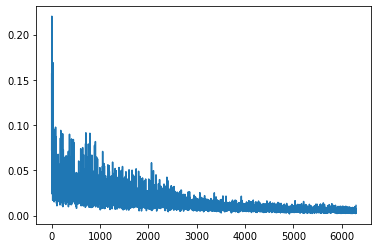

In [12]:
# 
torch.save(net.state_dict(), '/home/dan/linda_project2/linda_data/Datasets/newtest10/final.pkl')
import matplotlib.pyplot as plt

plt.plot(costs2)
plt.show()
#plt.savefig('cost-bn-512resultD+   E.jpg')

In [13]:
t0 = transforms.Compose([transforms.ToTensor(),
                        ])
t1 = transforms.Compose([transforms.ToPILImage(),
                        ])
t2 = lambda x: x.transpose(Image.FLIP_LEFT_RIGHT)
t3 = lambda x: t0(t2(x))

#print(Variable(pic, requires_grad = False))
#net2.eval()
#netD.eval()
#pic=color.rgb2lab(t1(pic.squeeze().cpu()))
#torch.save(net2.state_dict(), '/home/kamata/linda/0114unetedge/0122last/dloss2/400.pkl')

In [102]:
print(hymenoptera_dataset1[94])

(tensor([[[0.7255, 0.7255, 0.7255,  ..., 0.7294, 0.7294, 0.7294],
         [0.7255, 0.7255, 0.7255,  ..., 0.7294, 0.7294, 0.7294],
         [0.7294, 0.7294, 0.7294,  ..., 0.7294, 0.7294, 0.7294],
         ...,
         [0.4588, 0.4549, 0.4510,  ..., 1.0000, 0.9922, 0.9882],
         [0.4627, 0.4588, 0.4510,  ..., 0.9961, 1.0000, 1.0000],
         [0.4627, 0.4588, 0.4510,  ..., 0.9961, 1.0000, 1.0000]],

        [[0.8667, 0.8667, 0.8667,  ..., 0.8627, 0.8627, 0.8627],
         [0.8667, 0.8667, 0.8667,  ..., 0.8627, 0.8627, 0.8627],
         [0.8627, 0.8627, 0.8627,  ..., 0.8627, 0.8627, 0.8627],
         ...,
         [0.5137, 0.5098, 0.5059,  ..., 0.9882, 0.9882, 0.9843],
         [0.5137, 0.5098, 0.5020,  ..., 0.9882, 0.9922, 0.9922],
         [0.5137, 0.5098, 0.5020,  ..., 0.9882, 0.9961, 1.0000]],

        [[0.8588, 0.8588, 0.8588,  ..., 0.8667, 0.8667, 0.8667],
         [0.8588, 0.8588, 0.8588,  ..., 0.8667, 0.8667, 0.8667],
         [0.8588, 0.8588, 0.8588,  ..., 0.8667, 0.8667, 0

In [15]:
data_transform3 = transforms.Compose([
#     transforms.Scale(256),
    transforms.CenterCrop(480),
    transforms.ToTensor(),

])
# hymenoptera_dataset1 = datasets.ImageFolder(root='/home/kamata/linda/0508/train-urban/rgb',
#                                            transform=data_transform)
hymenoptera_dataset3= datasets.ImageFolder(
    root='/home/dan/linda_project2/linda_data/Datasets/nirscene1/testcol/',    
                                            transform=data_transform3)
print('dasd')
hymenoptera_dataset4= datasets.ImageFolder(
    root='/home/dan/linda_project2/linda_data/Datasets/nirscene1/testnir/',    
                                            transform=data_transform3)

dasd


In [12]:

def saveresult(i,a):         # 'a' means which image 
    picI = hymenoptera_dataset4[a][0]    # means only the image
    picC = hymenoptera_dataset3[a][0]
    inn = picI[0:1,:,:]    # only one channel
    inp = net2.g(Variable(inn.unsqueeze(0).cuda()))  # add one dim in dim-1
    pic = t1(picC)
    #pic = pic.filter(ImageFilter.FIND_EDGES)
    plt.figure('data', figsize=(12,4))
    plt.subplot(1,4,1)    # one row, 4 column, number one
    plt.title('Fig.1 Input-infrared')
    imshow(t1(picI))
    plt.subplot(1,4,3)
    plt.title('Fig.3 output')
    inpc = inp.data.cpu().squeeze(0)    # remove the first-dim
    inpc = torch.clamp(inpc,0,1)      # make inpc all >= 0.1, when value < 0.1, make it 0.1
    imshow(t1(inpc))
    plt.subplot(1,4,2)
    plt.title('Fig.2 GT')
    imshow(pic)
    plt.subplot(1,4,4)
    plt.title('Fig.4 output+Filters')
    inpc = t1(inpc)
    inpc = inpc.filter(ImageFilter.DETAIL)
    inpc = inpc.filter(ImageFilter.EDGE_ENHANCE)
    #inpc = t1(t0(inpc) + t0(pic))
    inpc = np.asarray(inpc)
    inpc = cv2.bilateralFilter(inpc,9,175,175)
    imshow(inpc)
    plt.savefig('/home/dan/linda_project/linda_data/Datasets/save_ima/sigmoid/'+str(a)+'UNet'+str(i)+'.jpg')
def saveresult2(i,a):
    picI = hymenoptera_dataset4[a][0]
    inn = picI[0:1,:,:]
    inp = net2.g(Variable(inn.unsqueeze(0).cuda()))
    inpc = inp.data.cpu().squeeze(0)
    inpc = torch.clamp(inpc,0,1)
    inpc = t1(inpc)
    pic_name = '/home/dan/linda_project/linda_data/Datasets/save_ima/small_dataset/'+str(a)+'.jpg'
    inpc.save(pic_name)

In [47]:
print(hymenoptera_dataset3[0][0])

tensor([[[0.1569, 0.1569, 0.1608,  ..., 0.1373, 0.1373, 0.1333],
         [0.1569, 0.1569, 0.1569,  ..., 0.1373, 0.1373, 0.1373],
         [0.1451, 0.1451, 0.1529,  ..., 0.1373, 0.1373, 0.1373],
         ...,
         [0.5529, 0.5412, 0.5412,  ..., 0.9020, 0.9216, 0.9020],
         [0.5529, 0.5412, 0.5451,  ..., 0.9059, 0.9176, 0.8980],
         [0.5569, 0.5451, 0.5451,  ..., 0.8941, 0.9137, 0.9137]],

        [[0.2235, 0.2235, 0.2196,  ..., 0.2196, 0.2196, 0.2157],
         [0.2235, 0.2235, 0.2235,  ..., 0.2196, 0.2196, 0.2196],
         [0.2235, 0.2235, 0.2196,  ..., 0.2196, 0.2196, 0.2196],
         ...,
         [0.6235, 0.6118, 0.6118,  ..., 0.8902, 0.9020, 0.8745],
         [0.6235, 0.6118, 0.6157,  ..., 0.9176, 0.9333, 0.9059],
         [0.6275, 0.6157, 0.6157,  ..., 0.8824, 0.9059, 0.8941]],

        [[0.4353, 0.4353, 0.4353,  ..., 0.4353, 0.4353, 0.4314],
         [0.4353, 0.4353, 0.4353,  ..., 0.4353, 0.4353, 0.4353],
         [0.4314, 0.4314, 0.4314,  ..., 0.4353, 0.4353, 0.

In [16]:
def saveresult3(i,a):
    picI = hymenoptera_dataset4[a][0]
    inn = picI[0:1,:,:]
#     inp, classe = net.g(inn.unsqueeze(0).cuda())
    inp = net.g(inn.unsqueeze(0).cuda())
    inpc = inp.data.cpu().squeeze(0)
    inpc = torch.clamp(inpc,0,1)
    inpc = t1(inpc)
    pic_name = '/home/dan/linda_project2/linda_data/Datasets/newtest10/'+str(a)+'.jpg'
    inpc.save(pic_name)

In [17]:
net.eval()   #set to evaluate mode
epoch=400
for i in range(len(hymenoptera_dataset3)):
    saveresult3(epoch,i)

## evaluation part,
### PSNR and Cosine similarity

In [130]:
import numpy
import math

def psnrmse(a,b):
    mse = numpy.mean((a-b)**2)
    if mse==0:
        return 100
    max = 1
    psnr = 20*math.log10(max/math.sqrt(mse))
    return psnr, mse
import sklearn
from sklearn import metrics

def cosvalue(picrgb,picinf):
    r = sklearn.metrics.pairwise.cosine_similarity(picrgb[0],picinf[0])
    g = sklearn.metrics.pairwise.cosine_similarity(picrgb[1],picinf[1])
    b = sklearn.metrics.pairwise.cosine_similarity(picrgb[2],picinf[2])
    return numpy.mean((r+g+b)/3)
def piltonumpy(picrgb):
    picrgb = np.array(picrgb.getdata()).reshape(3, picrgb.size[0], picrgb.size[1])
    return picrgb

In [131]:
net.eval()
sumcos=0
sumpsnr=0
summse=0
for i in range(len(hymenoptera_dataset3)):
    
    rgb = hymenoptera_dataset3[i][0]     #tensor
    inf = hymenoptera_dataset4[i][0]
    inn = inf[0:1,:,:]
    inp = net.g(Variable(inn.unsqueeze(0).cuda()))
    inpc = inp.data.cpu().squeeze(0)
    inpc = torch.clamp(inpc,0,1)
    rgb = rgb.numpy()
    inf = inpc.numpy()
    cos = cosvalue(rgb,inf)
    psnr,mse = psnrmse(rgb,inf)
    sumcos = sumcos+cos
    sumpsnr += psnr
    summse += mse
    
avecos = sumcos/len(hymenoptera_dataset3)
avepsnr = sumpsnr/len(hymenoptera_dataset3)
avemse = summse/len(hymenoptera_dataset3)
print(avecos,avepsnr,avemse)

0.8998124954993265 16.026947483307715 0.02958611534548956


In [132]:
i=600
torch.save(net.state_dict(), '0104-GANrgbg-m'+str(i)+'.pkl')
torch.save(netD.state_dict(), '0104-GANrgbd-m'+str(i)+'.pkl')
saveresult(i,152)
saveresult(i,315)
saveresult(i,1)
saveresult(i,1520)

a = 65

picI = hymenoptera_dataset4[a][0]
picC = hymenoptera_dataset3[a][0]

NameError: name 'net2' is not defined

tensor([[[0.5416, 0.5584, 0.5540,  ..., 0.9452, 0.9249, 0.8530],
         [0.5715, 0.5511, 0.5738,  ..., 0.9499, 0.9433, 0.9196],
         [0.5901, 0.5653, 0.5799,  ..., 0.9523, 0.9475, 0.9253],
         ...,
         [0.2723, 0.2600, 0.2612,  ..., 0.2828, 0.2889, 0.3144],
         [0.2970, 0.2946, 0.2810,  ..., 0.2604, 0.2620, 0.3365],
         [0.3384, 0.3082, 0.2903,  ..., 0.2687, 0.2756, 0.3275]],

        [[0.5311, 0.5833, 0.5896,  ..., 0.9365, 0.9156, 0.8421],
         [0.5792, 0.6114, 0.6214,  ..., 0.9414, 0.9323, 0.9121],
         [0.6029, 0.6205, 0.6186,  ..., 0.9468, 0.9376, 0.9221],
         ...,
         [0.2693, 0.2509, 0.2579,  ..., 0.2757, 0.2813, 0.3080],
         [0.2887, 0.2844, 0.2739,  ..., 0.2534, 0.2711, 0.3355],
         [0.3221, 0.2947, 0.2797,  ..., 0.2577, 0.2720, 0.3206]],

        [[0.5648, 0.6209, 0.6287,  ..., 0.9265, 0.9043, 0.8192],
         [0.6077, 0.6574, 0.6752,  ..., 0.9321, 0.9237, 0.8836],
         [0.6268, 0.6723, 0.6744,  ..., 0.9301, 0.9288, 0.

FileNotFoundError: [Errno 2] No such file or directory: '/home/dan/linda_project/linda_data/Datasets/save_ima/o-odloss0.jpg'

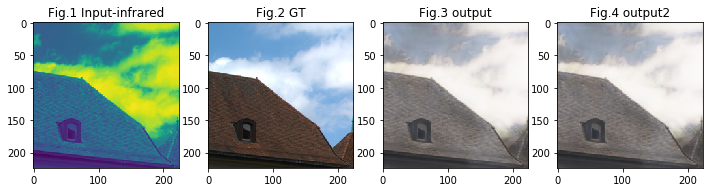

In [136]:
#picI = Image.open('/home/kamata/linda/0114unetedge/test0508/0007_nir.jpg')
#picC = Image.open('/home/kamata/linda/0114unetedge/test0508/0007_rgb.jpg')
picI = Image.open('/home/dan/linda_project2/linda_data/Datasets/Dataset1/urban/nir/1/0062_nir.jpg')
picC = Image.open('/home/dan/linda_project2/linda_data/Datasets/Dataset1/urban/rgb/1/0062_rgb.jpg')
a=100
b=50
box=[a,b,a+224,b+224]      # how big the network trains
picI=picI.crop(box)    # crop a rectangular place
picC=picC.crop(box)

inn = t0(picI)   # to tensor
inn = inn[0:1,:,:]
inp = net.g(Variable(inn.unsqueeze(0).cuda()))
inp2 = net(Variable(inn.unsqueeze(0).cuda()),inp)
pic = t0(picC)
#pic = pic.filter(ImageFilter.FIND_EDGES)
plt.figure('data', figsize=(12,4))
plt.subplot(1,4,1)
plt.title('Fig.1 Input-infrared')
imshow(picI)
plt.subplot(1,4,3)
plt.title('Fig.3 output')
inpc = inp.data.cpu().squeeze(0)
inpc = torch.clamp(inpc,0,1)
print(inpc)
imshow(t1(inpc))  # to PIL image
plt.subplot(1,4,2)
plt.title('Fig.2 GT')
imshow(t1(pic))
plt.subplot(1,4,4)
plt.title('Fig.4 output2')
inpc = inp2.data.cpu().squeeze(0)
inpc = torch.clamp(inpc,0,1)
inpc = t1(inpc)
imshow(inpc)

#pic_name = '/home/kamata/linda/0508/dloss3/o-odloss0.jpg'
pic_name = '/home/dan/linda_project/linda_data/Datasets/save_ima/o-odloss0.jpg'
inpc.save(pic_name)

In [33]:
picI = Image.open('/home/dan/linda_project/linda_data/Datasets/Dataset1/urban/nir/1/0062_nir.jpg')
picC = Image.open('/home/dan/linda_project/linda_data/Datasets/Dataset1/urban/rgb/1/0062_rgb.jpg')
a=100
b=50
box=[a,b,a+224,b+224]    
picI=picI.crop(box)    # crop a rectangular place
picC=picC.crop(box)

inn = t0(picI)   # to tensor

print(inn)
inn = inn[0:1,:,:]
print(inn)

tensor([[[0.3725, 0.3725, 0.3725,  ..., 0.9373, 0.9373, 0.9333],
         [0.3725, 0.3725, 0.3725,  ..., 0.9294, 0.9255, 0.9216],
         [0.3725, 0.3725, 0.3725,  ..., 0.9098, 0.9059, 0.9020],
         ...,
         [0.2510, 0.2510, 0.2471,  ..., 0.2941, 0.3137, 0.3176],
         [0.2627, 0.2627, 0.2627,  ..., 0.2549, 0.2745, 0.3647],
         [0.2588, 0.2588, 0.2588,  ..., 0.2235, 0.2471, 0.2706]]])
tensor([[[0.3725, 0.3725, 0.3725,  ..., 0.9373, 0.9373, 0.9333],
         [0.3725, 0.3725, 0.3725,  ..., 0.9294, 0.9255, 0.9216],
         [0.3725, 0.3725, 0.3725,  ..., 0.9098, 0.9059, 0.9020],
         ...,
         [0.2510, 0.2510, 0.2471,  ..., 0.2941, 0.3137, 0.3176],
         [0.2627, 0.2627, 0.2627,  ..., 0.2549, 0.2745, 0.3647],
         [0.2588, 0.2588, 0.2588,  ..., 0.2235, 0.2471, 0.2706]]])
